In [1]:
import pandas as pd
import numpy as np
from roughviz.charts import Bar, Barh
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
import seaborn as sns
import os
import tqdm
import imageio
from textblob import TextBlob

from PIL import Image
from matplotlib import font_manager
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, OffsetBox

In [2]:
road = pd.read_csv("pseudo_data_updated.csv")
#road.head(), raw data carries sensitive information, when cannot be outputted

In [3]:
#filtered out sensitive data columns
road = road.drop([1])
road.drop(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'ResponseId', 'DistributionChannel'], axis=1, inplace=True)
road = road.fillna('NO INPUT')
road = road.reset_index(drop=True)
print("Total number of respondents in survey from semi-raw data: " + str(road.index.size - 1))
#road.head()

Total number of respondents in survey from semi-raw data: 274


In [4]:
unfinished_data = road[road['Finished'] == "False"]
print("Number of unfinished data: " + str(unfinished_data.index.size))
#unfinished_data.head()

Number of unfinished data: 46


In [5]:
useless_data = road[(road['2.'] == "NO INPUT") &
                    (road['2._13_TEXT'] == "NO INPUT") & 
                    (road['3._1'] == "NO INPUT") & 
                    (road['4.'] == "NO INPUT") & 
                    (road['5.'] == "NO INPUT") & 
                    (road['5b.'] == "NO INPUT") &
                    (road['6.'] == "NO INPUT") &
                    (road['6b.'] == "NO INPUT") &
                    (road['7.'] == "NO INPUT") &
                    (road['7._12_TEXT'] == "NO INPUT") &
                    (road['8._11_TEXT'] == "NO INPUT") &
                    (road['9.'] == "NO INPUT")].index
road = road.drop(useless_data)
road = road.reset_index(drop=True)
print("Total number of respondents in survey after cleanup: " + str(road.index.size - 1))
#road.head()

Total number of respondents in survey after cleanup: 268


In [6]:
#printing the amount of partially finished data
unfinished_data = road[road['Finished'] == "False"]
print("Number of unfinished data: " + str(unfinished_data.index.size))
#unfinished_data.head()

Number of unfinished data: 40


In [7]:
languages = road['UserLanguage'].value_counts()
number_of_lang = pd.DataFrame(languages)
number_of_lang.reset_index(inplace=True)
number_of_lang.columns = ['UserLanuages', 'respondents']
number_of_lang = number_of_lang.drop([3])
number_of_lang['UserLanuages'] = number_of_lang['UserLanuages'].replace({'EN': 'ENGLISH', 'FR':'HAITIAN KREYOL', 'ES': 'SPANISH'})
print("Number of total respondents: " + str(number_of_lang['respondents'].sum()))
number_of_lang

Number of total respondents: 268


,UserLanuages,respondents
0,ENGLISH,100
1,HAITIAN KREYOL,86
2,SPANISH,82


<Axes: title={'center': 'Languages of Survey Responses'}, ylabel='respondents'>

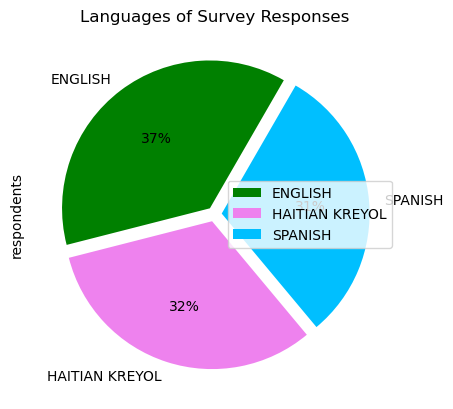

In [8]:
explode = (0.05, 0.05, 0.05) 
number_of_lang.groupby(['UserLanuages']).sum().plot(kind='pie', y='respondents', autopct='%1.0f%%',
                                colors = ['green', 'violet', 'deepskyblue'],
                                title='Languages of Survey Responses', explode=explode, startangle=60)

In [9]:
filtered_responses = road[road['2.'] != 'NO INPUT']
residence = filtered_responses['2.'].value_counts()
number_of_residence = pd.DataFrame(residence)
number_of_residence.reset_index(inplace=True)
number_of_residence.columns = ['Question 2.', 'respondents']
number_of_residence = number_of_residence.drop([2])
print("Number of total respondents: " + str(number_of_residence['respondents'].sum()))
number_of_residence

Number of total respondents: 240


,Question 2.,respondents
0,"Salisbury, Maryland",181
1,Other [please type City/State where you live],59


In [10]:
# Outliers

outliers = road[road['2.'] == 'Other [please type City/State where you live]']
#outliers['2._13_TEXT'] commented due to the inclusion of sensitive data

<Axes: title={'center': 'Place of Residence of Survey Responses'}, ylabel='respondents'>

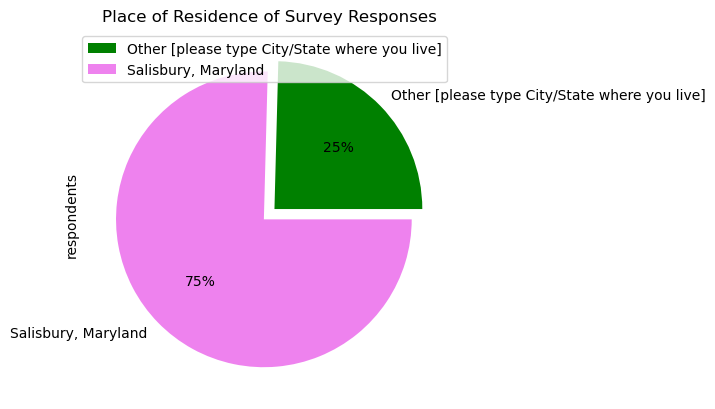

In [11]:
explode = (0.05, 0.05) 
number_of_residence.groupby(['Question 2.']).sum().plot(kind='pie', y='respondents', autopct='%1.0f%%',
                                colors = ['green', 'violet'],
                                title='Place of Residence of Survey Responses', explode=explode)

In [12]:
filtered_responses = road[road['3._1'] != 'NO INPUT']
visits = filtered_responses['3._1'].value_counts(sort=True)
number_of_visits = pd.DataFrame(visits)
number_of_visits.reset_index(inplace=True)
number_of_visits.columns = ['Question 3.', 'respondents']
number_of_visits['Question 3.'] = number_of_visits['Question 3.'].replace({'0': 'Never', '1':'Rarely', '2': 'Sometimes', '3': 'Frequently', '4': 'All the Time'})
number_of_visits = number_of_visits.drop([5])
print("Number of total respondents: " + str(number_of_visits['respondents'].sum()))
number_of_visits

Number of total respondents: 183


,Question 3.,respondents
0,Sometimes,59
1,All the Time,47
2,Frequently,38
3,Rarely,26
4,Never,13


In [13]:
filtered_responses = road[road['4.'] != 'NO INPUT']
form_of_transport = filtered_responses['4.'].value_counts(sort=True)
number_of_transport = pd.DataFrame(form_of_transport)
number_of_transport.reset_index(inplace=True)
number_of_transport.columns = ['Question 4.', 'selections']
print("Number of total respondents: " + str(number_of_transport['selections'].sum() - 1))
number_of_transport['Question 4.'] = number_of_transport['Question 4.'].str.split(",")
number_of_transport = number_of_transport.explode('Question 4.')
number_of_transport = number_of_transport.groupby(['Question 4.']).sum()
number_of_transport.reset_index(inplace=True)
number_of_transport = number_of_transport.drop([0, 4])
number_of_transport = number_of_transport.reset_index(drop=True)
number_of_transport

Number of total respondents: 258


,Question 4.,selections
0,Bicycle,17
1,Bird Scooter,2
2,Carpool / Vanpool,10
3,Personal vehicle,229
4,Shore Transit Bus,5
5,Taxi / Uber / Lyft,14
6,Walk / Jog,53


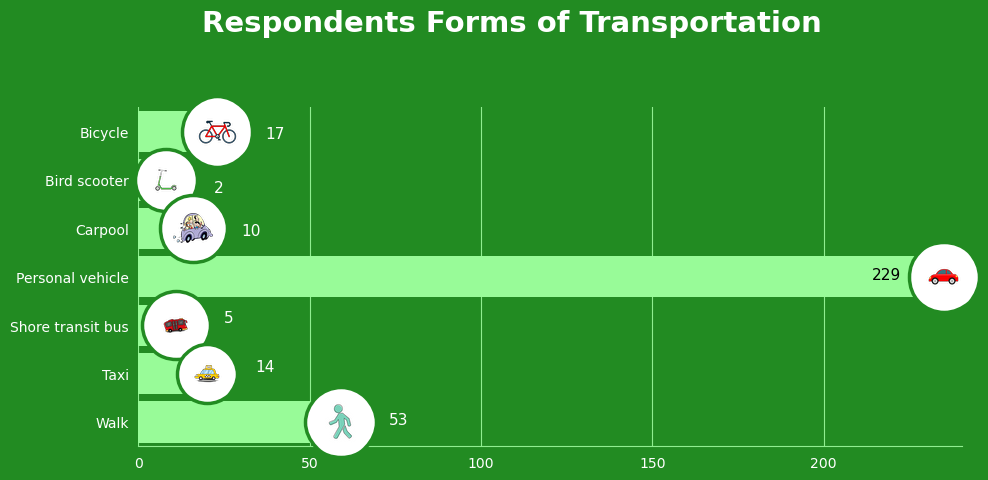

In [14]:
with sns.axes_style({
    "axes.facecolor": "forestgreen",
    "figure.facecolor": "forestgreen",
    "grid.color": "lightgreen",
    "axes.edgecolor": "lightgreen",
    "axes.grid": True,
    "axes.axisbelow": True,
    "axes.labelcolor": "white",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
}):

    photos = number_of_transport.replace({'Taxi / Uber / Lyft': 'Taxi', 'Walk / Jog': 'Walk', 'Carpool / Vanpool': 'Carpool'})
    number_of_transport2 = photos.pivot_table(values='selections', columns='Question 4.', aggfunc='first')
    number_of_transport2.index.name = None
    number_of_transport2 = number_of_transport2.reset_index(drop=True)
    row = number_of_transport2.iloc[-1]
    fig = plt.figure(figsize=(10, 5))
    ax = sns.barplot(number_of_transport,
            y=row.index.str.capitalize().values,
            x=row.values,
            orient="h",
            saturation=1,
            color="palegreen",
            width=0.85,
        )

    #Add photo icons
    for index, (name, value) in enumerate(row.items()): 
            icon = plt.imread("./icons/{}.png".format(name.lower()))
            image = OffsetImage(icon, zoom=0.05, interpolation="lanczos", resample=True, visible=True)
            image.image.axes = ax

            ax.add_artist(AnnotationBbox(
                image, (value + 6, index), frameon=True,
                xycoords="data",
                bboxprops={
                    "facecolor": "#fff",
                    "linewidth": 2.5,
                    "edgecolor": "forestgreen",
                    "boxstyle": "circle, pad={}".format(1),
                }
            ))
    
    #Add number labels
    locations = number_of_transport['Question 4.'].tolist()
    selections = number_of_transport['selections'].tolist()
    y = [i * 0.9 for i in range(len(locations))]
    
    PAD = 20
    for count,y_pos in zip(selections,y):
        x = 0
        color = "white"
        path_effects = None
        if count < 60:
            x = count
        if count == 14:
            y_pos += 0.1
        if count == 17:
            y_pos -= 0.2
        if count == 53:
            y_pos += 0.3
        if count == 229:
            x = count - (PAD + 15)
            color = "black"
            
        ax.text(
            x + PAD, y_pos + 0.5 / 2, count, 
            color=color, fontsize=11, va="center",
            path_effects=path_effects
        )
    
    #Add title
    plt.title("Respondents Forms of Transportation ", 
              fontsize=21, 
              weight='bold', 
              y=1.2, 
              x=0.46
        )
    plt.tight_layout()
    plt.show()
    
    #The green is ugly, I'm going with the purple

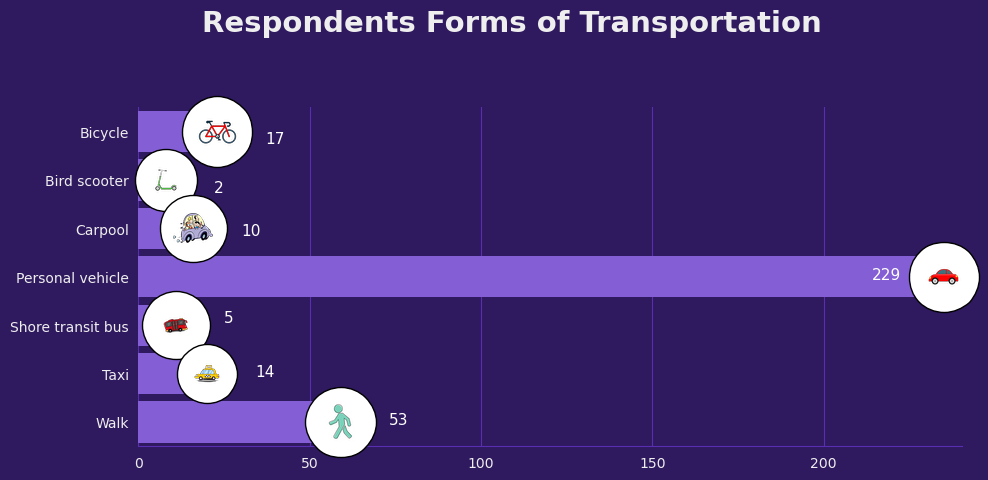

In [15]:
background_color = "#2F195F"
grid_color = "#582FB1"
bar_color = "#835ED4"
text_color = "#eee"

with sns.axes_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,
        "grid.color": grid_color,
        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,
        "axes.labelcolor": text_color,
        "text.color": text_color,
        "xtick.color": text_color,
        "ytick.color": text_color,
        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,
        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
}):
   
    photos = number_of_transport.replace({'Taxi / Uber / Lyft': 'Taxi', 'Walk / Jog': 'Walk', 'Carpool / Vanpool': 'Carpool'})
    number_of_transport2 = photos.pivot_table(values='selections', columns='Question 4.', aggfunc='first')
    number_of_transport2.index.name = None
    number_of_transport2 = number_of_transport2.reset_index(drop=True)
    row = number_of_transport2.iloc[-1]
    fig = plt.figure(figsize=(10, 5))
    ax = sns.barplot(number_of_transport,
            y=row.index.str.capitalize().values,
            x=row.values,
            orient="h",
            saturation=1,
            color= bar_color,
            width=0.85,
        )

    for index, (name, value) in enumerate(row.items()): 
            icon = plt.imread("./icons/{}.png".format(name.lower()))
            image = OffsetImage(icon, zoom=0.05, interpolation="lanczos", resample=True, visible=True)
            image.image.axes = ax

            ax.add_artist(AnnotationBbox(
                image, (value + 6, index), frameon=True,
                xycoords="data",
                bboxprops={
                    "facecolor": "#fff",
                    "linewidth": 1.0,
                    "edgecolor": "black",
                    "boxstyle": "circle, pad={}".format(1),
                }
            ))
            
    #Add number labels
    locations = number_of_transport['Question 4.'].tolist()
    selections = number_of_transport['selections'].tolist()
    y = [i * 0.9 for i in range(len(locations))]
    
    PAD = 20
    for count,y_pos in zip(selections,y):
        x = 0
        color = "white"
        path_effects = None
        if count < 60:
            x = count
        if count == 14:
            y_pos += 0.2
        if count == 17:
            y_pos -= 0.1
        if count == 53:
            y_pos += 0.3
        if count == 229:
            x = count - (PAD + 15)
            
        ax.text(
            x + PAD, y_pos + 0.5 / 2, count, 
            color=color, fontsize=11, va="center",
            path_effects=path_effects
        )
            
    plt.title("Respondents Forms of Transportation ", 
              fontsize=21,
              weight='bold', 
              y=1.2, 
              x=0.46
            )
    plt.tight_layout()
    plt.show()

In [16]:
filtered_responses = road[road['5.'] != 'NO INPUT']
walking = filtered_responses['5.'].value_counts()
safe_for_walking = pd.DataFrame(walking)
safe_for_walking.reset_index(inplace=True)
safe_for_walking.columns = ['Question 5.', 'respondents']
safe_for_walking = safe_for_walking.drop([2])
print("Number of total respondents: " + str(safe_for_walking['respondents'].sum()))
safe_for_walking

Number of total respondents: 231


,Question 5.,respondents
0,"No, I believe safety improvements are needed f...",175
1,"Yes, I believe the roads are safe for walking",56


<Axes: title={'center': 'Do you believe the roads are safe for walking?'}, ylabel='respondents'>

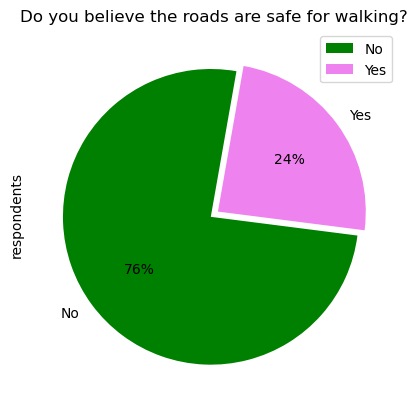

In [17]:
explode = (0.03, 0.03) 
safe_for_walking = safe_for_walking.replace({'No, I believe safety improvements are needed for walking': 'No',
                                          'Yes, I believe the roads are safe for walking': 'Yes'})
safe_for_walking.groupby(['Question 5.']).sum().plot(kind='pie', y='respondents', autopct='%1.0f%%',
                                colors = ['green', 'violet'],
                                title='Do you believe the roads are safe for walking?', explode=explode,startangle=80, fontsize=10)

In [18]:
walkers = road[road['4.'].str.contains('Walk / Jog')] 
print("Total number of walkers/joggers: " + str(len(walkers)))

walkers_opinion = walkers[walkers['5.'] == 'No, I believe safety improvements are needed for walking']
print("Number of walkers that answered 'No' to question 5: " + str(len(walkers_opinion)))

Total number of walkers/joggers: 53
Number of walkers that answered 'No' to question 5: 38


In [19]:
filtered_responses = road[road['6.'] != 'NO INPUT']
biking = filtered_responses['6.'].value_counts()
safe_for_biking = pd.DataFrame(biking)
safe_for_biking.reset_index(inplace=True)
safe_for_biking.columns = ['Question 6.', 'respondents']
safe_for_biking.drop([2], inplace=True)
print("Number of total respondents: " + str(safe_for_biking['respondents'].sum()))
safe_for_biking

Number of total respondents: 211


,Question 6.,respondents
0,"No, I believe safety improvements are needed f...",135
1,"Yes, I believe the roads are safe for biking",76


In [20]:
bikers = road[road['4.'].str.contains('Bicycle')] 
print("Total number of bikers: " + str(len(bikers)))

bikers_opinion = bikers[bikers['6.'] == 'No, I believe safety improvements are needed for biking']
print("Number of bikers that answered 'No' to question 6: " + str(len(bikers_opinion)))

Total number of bikers: 17
Number of bikers that answered 'No' to question 6: 10


<Axes: title={'center': 'Do you believe the roads are safe for biking?'}, ylabel='respondents'>

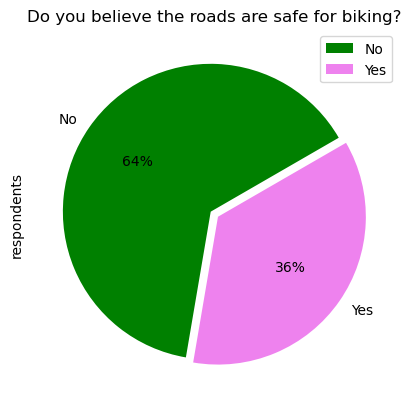

In [21]:
explode = (0.03, 0.03) 
safe_for_biking = safe_for_biking.replace({'No, I believe safety improvements are needed for biking': 'No',
                                          'Yes, I believe the roads are safe for biking': 'Yes'})
safe_for_biking.groupby(['Question 6.']).sum().plot(kind='pie', y='respondents', autopct='%1.0f%%',
                                colors = ['green', 'violet'],
                                title='Do you believe the roads are safe for biking?', explode=explode,startangle=30, fontsize=10)

In [22]:
filtered_responses = road[road['7.'] != 'NO INPUT']
form_of_implmentation = filtered_responses['7.'].value_counts(sort=True)
number_of_implmentation = pd.DataFrame(form_of_implmentation)
number_of_implmentation.reset_index(inplace=True)
number_of_implmentation.columns = ['Question 7.', 'selections']
print("Number of total respondents: " + str(number_of_implmentation['selections'].sum() - 1))
number_of_implmentation['Question 7.'] = number_of_implmentation['Question 7.'].str.split(",")
number_of_implmentation = number_of_implmentation.explode('Question 7.')
number_of_implmentation = number_of_implmentation.groupby(['Question 7.']).sum()
number_of_implmentation.reset_index(inplace=True)
number_of_implmentation = number_of_implmentation.drop([9])
number_of_implmentation = number_of_implmentation.reset_index(drop=True)
number_of_implmentation = number_of_implmentation.sort_values('selections', ascending=False)
number_of_implmentation

Number of total respondents: 224


,Question 7.,selections
5,Sidewalks,177
8,Streetlights,159
1,Crosswalks,136
0,Bike lanes,98
2,Lowering the speed limit,59
7,Speed humps,50
4,Roundabouts,48
6,Speed cameras,48
3,Other: [please list any other road safety ideas],16


In [23]:
number_of_implmentation = number_of_implmentation.replace({'Other: [please list any other road safety ideas]': 'Other'})
graph_for_implementation = Barh(data=number_of_implmentation,
                                values="selections",
                                labels="Question 7.",
                                title="Number of Road Implementation Selections",
                                title_fontsize=3)
graph_for_implementation.set_xlabel("Selections", fontsize=2)

graph_for_implementation.show()

In [24]:
filtered_responses = road[road['8.'] != 'NO INPUT']
bus_stops = filtered_responses['8.'].value_counts(sort=True)
location_of_bus_stops = pd.DataFrame(bus_stops)
location_of_bus_stops.reset_index(inplace=True)
location_of_bus_stops.columns = ['Question 8.', 'selections']
print("Number of total respondents: " + str(location_of_bus_stops['selections'].sum() - 1))
location_of_bus_stops['Question 8.'] = location_of_bus_stops['Question 8.'].str.split(",")
location_of_bus_stops = location_of_bus_stops.explode('Question 8.')
location_of_bus_stops = location_of_bus_stops.groupby(['Question 8.']).sum()
location_of_bus_stops.reset_index(inplace=True)
location_of_bus_stops = location_of_bus_stops.drop([8])
location_of_bus_stops = location_of_bus_stops.reset_index(drop=True)
location_of_bus_stops = location_of_bus_stops.sort_values('selections', ascending=False)
location_of_bus_stops

Number of total respondents: 199


,Question 8.,selections
0,Cypress Road (Sav A Lot parking lot),106
3,Isabella Street (Habitat for Humanity),102
5,Lake Street (Village of Hope and Homes on John...,92
4,Lake Street (Lake Street Park),84
1,Gateway Street (Gateway Village),70
7,West Road (Westbrook Commons and Coty Cox),69
2,I don’t think any bus stops are needed,24
6,Other Locations? [please list any additional l...,14


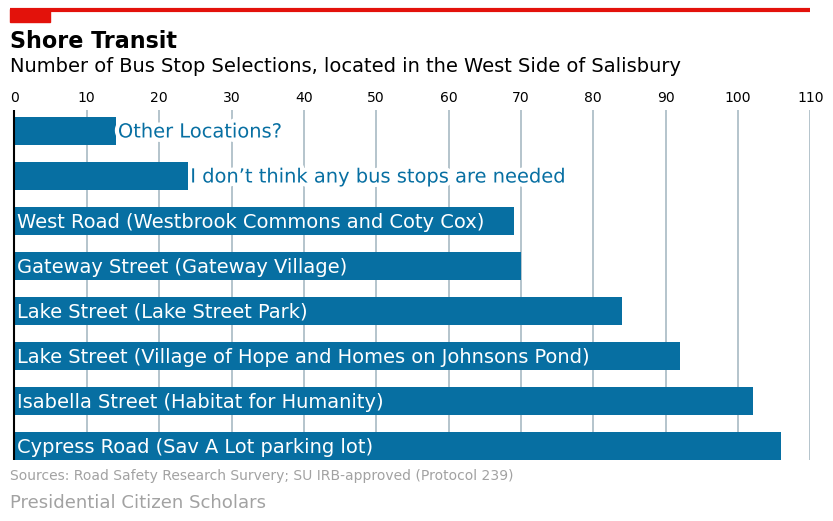

In [25]:
location_of_bus_stops = location_of_bus_stops.replace({'Other Locations? [please list any additional locations]': 'Other Locations?'})
locations = location_of_bus_stops['Question 8.'].tolist()
selections = location_of_bus_stops['selections'].tolist()
y = [i * 0.9 for i in range(len(locations))]

# The colors
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

fig, ax = plt.subplots(figsize=(8, 5))

ax.barh(y,selections, height=0.55, align="edge", color=BLUE);

ax.xaxis.set_ticks([i * 10 for i in range(0, 15)])
ax.xaxis.set_ticklabels([i * 10 for i in range(0,15)], size=10, fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, 110))
ax.set_ylim((0, len(locations) * 0.9 - 0.2))

ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.yaxis.set_visible(False)

PAD = 0.3
for name, count, y_pos in zip(locations,selections, y):
    x = 0
    color = "white"
    path_effects = None
    if count < 30:
        x = count
        color = BLUE    
        path_effects=[withStroke(linewidth=6, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color=color, fontsize=14, va="center",
        path_effects=path_effects
    ) 
    
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

fig.text(
    0, 0.925, "Shore Transit", 
    fontsize=16, fontweight="bold"
)
# Add subtitle
fig.text(
    0, 0.875, "Number of Bus Stop Selections, located in the West Side of Salisbury", 
    fontsize=14
)

# Add caption
source = "Sources: Road Safety Research Survery; SU IRB-approved (Protocol 239)"
fig.text(
    0, 0.06, source, color=GREY, 
    fontsize=10
)

# Add authorship
fig.text(
    0, 0.005, "Presidential Citizen Scholars", color=GREY,
    fontsize=13
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Set facecolor, useful when saving as .png
fig.set_facecolor("white")

In [26]:
def count_words_in_column(column, selected_words):
    word_counts = {}
    for word in selected_words:
        word_counts[word] = column.str.lower().str.count(word.lower()).sum()
    return word_counts

def word_mentions(original):
    qualitative_data = original[['5b.', '6b.', '7._12_TEXT', '8._11_TEXT', '9.']]
    qualitative_data = qualitative_data.drop([0])
    qualitative_data.reset_index(drop=True,inplace=True)
    sidewalks = ['sidewalks', 'side walks', 'twotwa']
    bikes = ['bike lanes', 'bekàn', 'bekan']
    bus = ['bus', 'buses', 'bis', 'transpor']
    streetlights = ['streetlights', 'street lights',  'limyè', 'limye']
    crossworks = ['crosswalks', 'cross walks', 'travèse', 'travese', 'jambe']
    selected_words = sidewalks + bikes + bus + streetlights + crossworks
    total_word_counts = {}
    for column in qualitative_data.columns:
        column_counts = count_words_in_column(qualitative_data[column], selected_words)
        for word, count in column_counts.items():
            total_word_counts[word] = total_word_counts.get(word, 0) + count

    total_word_counts
    total_number_mentions = pd.DataFrame([total_word_counts])
    total_number_mentions['sidewalks'] = total_number_mentions['sidewalks'] + total_number_mentions['side walks'] + total_number_mentions['twotwa']
    total_number_mentions['bike lanes'] = total_number_mentions['bike lanes'] + total_number_mentions['bekàn'] + total_number_mentions['bekan']
    total_number_mentions['bus'] = total_number_mentions['bus'] + total_number_mentions['bis'] + total_number_mentions['buses'] + total_number_mentions['transpor']
    streetlights_strings = streetlights
    crossworks_strings = crossworks
    total_number_mentions['streetlights'] = total_number_mentions[streetlights_strings].sum(axis=1)
    total_number_mentions['crosswalks'] = total_number_mentions[crossworks_strings].sum(axis=1)
    total_number_mentions = total_number_mentions.drop(['side walks', 'street lights', 
                                                        'buses', 'bis', 'transpor',
                                                        'cross walks', 'twotwa',  
                                                        'bekàn', 'bekan',
                                                       'buses', 'bis', 'transpor',
                                                       'travèse', 'travese', 'jambe',
                                                       'limyè', 'limye'], axis=1)
    total_number_mentions = total_number_mentions.reset_index(drop=True)
    return total_number_mentions

total_number_mentions = word_mentions(road)
total_number_mentions

,sidewalks,bike lanes,bus,streetlights,crosswalks
0,55,34,22,6,17


In [27]:
#Convert data from string to numberic value to do arithmetic comparisons
road['3._1'] = pd.to_numeric(road['3._1'], errors='coerce')
those_who_answered = road.dropna(subset=['3._1'])
westside_staeholders = those_who_answered[those_who_answered['3._1'] >= 3]
stakeholders_QL_data = westside_staeholders[['UserLanguage','3._1','4.', '5.', '5b.', '6.', '6b.', '7.', '7._12_TEXT', '8.', '8._11_TEXT', '9.']]
stakeholders_QL_data = stakeholders_QL_data.reset_index(drop=True)
stakeholders_QL_data

,UserLanguage,3._1,4.,5.,5b.,6.,6b.,7.,7._12_TEXT,8.,8._11_TEXT,9.
0,ES,3.0,"Personal vehicle,Walk / Jog","No, I believe safety improvements are needed f...",NO INPUT,"No, I believe safety improvements are needed f...",NO INPUT,"Speed humps,Bike lanes,Sidewalks,Streetlights",NO INPUT,Lake Street (Village of Hope and Homes on John...,NO INPUT,NO INPUT
1,ES,4.0,Personal vehicle,"No, I believe safety improvements are needed f...",NO INPUT,"No, I believe safety improvements are needed f...",NO INPUT,Other: [please list any other road safety ideas],Why are you asking opinion about this? Speed l...,"Cypress Road (Sav A Lot parking lot),Lake Stre...",Pemberton Drive. Transit isn’t just for disadv...,NO INPUT
2,EN,4.0,Personal vehicle,"Yes, I believe the roads are safe for walking",Where there are sidewalks,"Yes, I believe the roads are safe for biking",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
3,EN,3.0,Bicycle,"No, I believe safety improvements are needed f...",Please slow down traffic on West Rd and Lake St,"Yes, I believe the roads are safe for biking",It has gotten much better with bike lanes inst...,"Speed humps,Bike lanes,Sidewalks,Lowering the ...",NO INPUT,"Cypress Road (Sav A Lot parking lot),Lake Stre...",NO INPUT,NO INPUT
4,EN,3.0,Personal vehicle,"No, I believe safety improvements are needed f...",Nou bezwen plis totwa pou pyeton mache nan zòn...,"No, I believe safety improvements are needed f...",Anpil nan wout yo pa genyen liy spesyal pou be...,"Bike lanes,Sidewalks,Streetlights,Roundabouts,...",NO INPUT,Cypress Road (Sav A Lot parking lot),NO INPUT,Lake Street renmen inonde sitou lè dlo a monte...
...,...,...,...,...,...,...,...,...,...,...,...,...
80,EN,4.0,Personal vehicle,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
81,EN,4.0,Personal vehicle,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
82,ES,4.0,Personal vehicle,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
83,EN,4.0,Personal vehicle,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT


In [28]:
import time
def animated_counter(word_name, word_count, target):
    for word_count in range(word_count + 1):
        word_bolded = "\033[1m" + word_name + "\033[0m"
        if(target == 1):
            output = f'The number of times {word_bolded} was mentioned is {word_count}'
        else: 
             output = f'{word_count} of the {word_bolded} mentions are from frequent visitors/residents in the West Side'
        print(f'\r{output}', end='', flush=True)  # Ensure the output is immediately flushed to the console
        time.sleep(0.04) #Adjusted sleep duration

    print()  # Move to the next line after the animation completes

total_number_mentions1 = word_mentions(stakeholders_QL_data) 

for word_name in total_number_mentions.columns:
    word_count = total_number_mentions.loc[0, word_name]
    target = 1;
    animated_counter(word_name, word_count, target)

print()

for word_name in total_number_mentions1.columns:
    word_count1 = total_number_mentions1.loc[0, word_name]
    target = 0;
    animated_counter(word_name, word_count1, target)

The number of times sidewalks was mentioned is 55
The number of times bike lanes was mentioned is 34
The number of times bus was mentioned is 22
The number of times streetlights was mentioned is 6
The number of times crosswalks was mentioned is 17

20 of the sidewalks mentions are from frequent visitors/residents in the West Side
17 of the bike lanes mentions are from frequent visitors/residents in the West Side
5 of the bus mentions are from frequent visitors/residents in the West Side
1 of the streetlights mentions are from frequent visitors/residents in the West Side
5 of the crosswalks mentions are from frequent visitors/residents in the West Side


In [29]:
#Stats of stakeholders

percentage = (len(stakeholders_QL_data) / len(road)) * 100
percentage = round(percentage, 2)
print("\033[1m" + str(len(stakeholders_QL_data)) + "\033[0m" + " (" + str(percentage) + "%) respondents are regular/frequent visitors or live in the west side")

haitian_creole = (stakeholders_QL_data['UserLanguage'].value_counts()['FR'])
spanish = stakeholders_QL_data['UserLanguage'].value_counts()['ES']
english = stakeholders_QL_data['UserLanguage'].value_counts()['EN']

haitian_creole_percent = round((haitian_creole/len(stakeholders_QL_data))*100, 2)
spanish_percent = round((spanish/len(stakeholders_QL_data))*100, 2)
english_percent = round((english/len(stakeholders_QL_data))*100, 2)

print("Of that number ...")
print("\033[1m" + str(haitian_creole) + "\033[0m" + " (" + str(haitian_creole_percent) + "%) respondents completed the survey in haitian creole")
print("\033[1m" + str(spanish) + "\033[0m" + " (" + str(spanish_percent) + "%) respondent completed the survey in spanish")
print("\033[1m" + str(english) + "\033[0m" + " (" + str(english_percent) + "%) respondents completed the survey in english")

85 (31.6%) respondents are regular/frequent visitors or live in the west side
Of that number ...
28 (32.94%) respondents completed the survey in haitian creole
27 (31.76%) respondent completed the survey in spanish
30 (35.29%) respondents completed the survey in english


In [30]:
no_for_walking = (stakeholders_QL_data['5.'].value_counts()['No, I believe safety improvements are needed for walking'])
yes_for_walking = stakeholders_QL_data['5.'].value_counts()['Yes, I believe the roads are safe for walking']

no_for_biking = (stakeholders_QL_data['6.'].value_counts()['No, I believe safety improvements are needed for biking'])
yes_for_biking = stakeholders_QL_data['6.'].value_counts()['Yes, I believe the roads are safe for biking']

no_for_walking_percent = round((no_for_walking/len(stakeholders_QL_data))*100, 2)
yes_for_walking_percent = round((yes_for_walking/len(stakeholders_QL_data))*100, 2)

no_for_biking_percent = round((no_for_biking/len(stakeholders_QL_data))*100, 2)
yes_for_biking_percent = round((yes_for_biking/len(stakeholders_QL_data))*100, 2)

print('"' + road['5.'][0] + '"')
print("\033[1m" + str(no_for_walking_percent) + "\033[0m" + "% of respondents say 'No, I believe safety improvements are needed for walking'")
print("\033[1m" + str(yes_for_walking_percent) + "\033[0m" + "% of respondents say 'Yes, I believe the roads are safe for walking'" + "\n")

print('"' + road['6.'][0] + '"')
print("\033[1m" + str(no_for_biking_percent) + "\033[0m" + "% of respondents say 'No, I believe safety improvements are needed for biking'")
print("\033[1m" + str(yes_for_biking_percent) + "\033[0m" + "% of respondents say 'Yes, I believe the roads are safe for biking'" + "\n")

"Do you believe the roads on the West side of Salisbury are safe for individuals who walk in the area?"
68.24% of respondents say 'No, I believe safety improvements are needed for walking'
18.82% of respondents say 'Yes, I believe the roads are safe for walking'

"Do you believe the roads on the West side of Salisbury are safe for individuals who bike in the area?"
51.76% of respondents say 'No, I believe safety improvements are needed for biking'
30.59% of respondents say 'Yes, I believe the roads are safe for biking'



In [31]:
no_input = stakeholders_QL_data[stakeholders_QL_data['4.'] != 'NO INPUT']
stakeholders_FOT = no_input['4.'].value_counts(sort=True)
stakeholders_transport = pd.DataFrame(stakeholders_FOT)
stakeholders_transport.reset_index(inplace=True)
stakeholders_transport.columns = ['Question 4.', 'selections']
print("Number of total respondents: " + str(stakeholders_transport['selections'].sum()))
stakeholders_transport['Question 4.'] = stakeholders_transport['Question 4.'].str.split(",")
stakeholders_transport = stakeholders_transport.explode('Question 4.')
stakeholders_transport = stakeholders_transport.groupby(['Question 4.']).sum()
stakeholders_transport.reset_index(inplace=True)
stakeholders_transport

Number of total respondents: 85


,Question 4.,selections
0,Bicycle,4
1,Carpool / Vanpool,3
2,Personal vehicle,79
3,Walk / Jog,9


In [32]:
filtered= stakeholders_QL_data[stakeholders_QL_data['7.'] != 'NO INPUT']
stakeholders_implmentation = filtered['7.'].value_counts(sort=True)
stakeholders_selections = pd.DataFrame(stakeholders_implmentation)
stakeholders_selections.reset_index(inplace=True)
stakeholders_selections.columns = ['Question 7.', 'selections']
total_respondents = stakeholders_selections['selections'].sum()
print("Number of total respondents: " + str(total_respondents))
stakeholders_selections['Question 7.'] = stakeholders_selections['Question 7.'].str.split(",")
stakeholders_selections = stakeholders_selections.explode('Question 7.')
stakeholders_selections = stakeholders_selections.groupby(['Question 7.']).sum()
stakeholders_selections.reset_index(inplace=True)
stakeholders_selections = stakeholders_selections.sort_values('selections', ascending=False)
stakeholders_selections['percentage based on total respondents'] = round((stakeholders_selections['selections'] / total_respondents)*100, 2)
stakeholders_selections

Number of total respondents: 73


,Question 7.,selections,percentage based on total respondents
5,Sidewalks,51,69.86
8,Streetlights,50,68.49
1,Crosswalks,45,61.64
0,Bike lanes,33,45.21
2,Lowering the speed limit,18,24.66
6,Speed cameras,17,23.29
4,Roundabouts,16,21.92
7,Speed humps,16,21.92
3,Other: [please list any other road safety ideas],5,6.85


In [33]:
filtered = stakeholders_QL_data[stakeholders_QL_data['8.'] != 'NO INPUT']
stakeholders_bus_stops = filtered['8.'].value_counts(sort=True)
stakeholders_bus_implement = pd.DataFrame(stakeholders_bus_stops)
stakeholders_bus_implement.reset_index(inplace=True)
stakeholders_bus_implement.columns = ['Question 8.', 'selections']
total_respondents = stakeholders_bus_implement['selections'].sum()
print("Number of total respondents: " + str(stakeholders_bus_implement['selections'].sum() - 1))
stakeholders_bus_implement['Question 8.'] = stakeholders_bus_implement['Question 8.'].str.split(",")
stakeholders_bus_implement = stakeholders_bus_implement.explode('Question 8.')
stakeholders_bus_implement = stakeholders_bus_implement.groupby(['Question 8.']).sum()
stakeholders_bus_implement.reset_index(inplace=True)
stakeholders_bus_implement = stakeholders_bus_implement.sort_values('selections', ascending=False)
stakeholders_bus_implement['percentage based on total respondents'] = round((stakeholders_bus_implement['selections'] / total_respondents)*100, 2)
stakeholders_bus_implement

Number of total respondents: 65


,Question 8.,selections,percentage based on total respondents
0,Cypress Road (Sav A Lot parking lot),42,63.64
3,Isabella Street (Habitat for Humanity),31,46.97
5,Lake Street (Village of Hope and Homes on John...,30,45.45
4,Lake Street (Lake Street Park),28,42.42
7,West Road (Westbrook Commons and Coty Cox),27,40.91
1,Gateway Street (Gateway Village),22,33.33
2,I don’t think any bus stops are needed,8,12.12
6,Other Locations? [please list any additional l...,4,6.06


In [34]:
# Qualitative Data Here for Stakeholders
def analyze_sentiment(text):
    if text == 'NO INPUT':
        return 'No sentiment to detect'
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

comments_sentiment = stakeholders_QL_data[['5b.', '6b.', '7._12_TEXT', '8._11_TEXT', '9.']]
no_comments = comments_sentiment[
                    (comments_sentiment['5b.'] == "NO INPUT") &
                    (comments_sentiment['6b.'] == "NO INPUT") &
                    (comments_sentiment['7._12_TEXT'] == "NO INPUT") &
                    (comments_sentiment['8._11_TEXT'] == "NO INPUT") &
                    (comments_sentiment['9.'] == "NO INPUT")].index
comments_sentiment = comments_sentiment.drop(no_comments)
comments_sentiment = comments_sentiment.reset_index(drop=True)

for column in comments_sentiment:
    sentiment_column = f"Q{column}_sentiment"
    comments_sentiment[sentiment_column] = comments_sentiment[column].apply(analyze_sentiment)
    
comments_sentiment

,5b.,6b.,7._12_TEXT,8._11_TEXT,9.,Q5b._sentiment,Q6b._sentiment,Q7._12_TEXT_sentiment,Q8._11_TEXT_sentiment,Q9._sentiment
0,NO INPUT,NO INPUT,Why are you asking opinion about this? Speed l...,Pemberton Drive. Transit isn’t just for disadv...,NO INPUT,No sentiment to detect,No sentiment to detect,positive,neutral,No sentiment to detect
1,Where there are sidewalks,NO INPUT,NO INPUT,NO INPUT,NO INPUT,neutral,No sentiment to detect,No sentiment to detect,No sentiment to detect,No sentiment to detect
2,Please slow down traffic on West Rd and Lake St,It has gotten much better with bike lanes inst...,NO INPUT,NO INPUT,NO INPUT,negative,positive,No sentiment to detect,No sentiment to detect,No sentiment to detect
3,Nou bezwen plis totwa pou pyeton mache nan zòn...,Anpil nan wout yo pa genyen liy spesyal pou be...,NO INPUT,NO INPUT,Lake Street renmen inonde sitou lè dlo a monte...,neutral,neutral,No sentiment to detect,No sentiment to detect,neutral
4,Limited sidewalks (and those present don't con...,"Limited bike lanes/shoulders, high traffic vol...",NO INPUT,NO INPUT,NO INPUT,positive,negative,No sentiment to detect,No sentiment to detect,No sentiment to detect
5,NO INPUT,NO INPUT,NO INPUT,NO INPUT,Nope,No sentiment to detect,No sentiment to detect,No sentiment to detect,No sentiment to detect,neutral
6,"To keep from someone getting hit, they need a ...",Need improvement in the bike lane,NO INPUT,NO INPUT,We all need to get together and help with our ...,neutral,neutral,No sentiment to detect,No sentiment to detect,neutral
7,NO INPUT,NO INPUT,NO INPUT,NO INPUT,Salisbury roads are sucks,No sentiment to detect,No sentiment to detect,No sentiment to detect,No sentiment to detect,negative
8,NO INPUT,NO INPUT,NO INPUT,Parsons rd,NO INPUT,No sentiment to detect,No sentiment to detect,No sentiment to detect,neutral,No sentiment to detect
9,It’s a high traffic flow area mixed with a den...,NO INPUT,NO INPUT,NO INPUT,NO INPUT,positive,No sentiment to detect,No sentiment to detect,No sentiment to detect,No sentiment to detect


In [35]:
question5_sentinment = comments_sentiment[['5b.', 'Q5b._sentiment']]
no_input = question5_sentinment[question5_sentinment['5b.'] == "NO INPUT"].index
question5_sentinment = question5_sentinment.drop(no_input)
question5_sentinment = question5_sentinment.reset_index(drop=True)
question5_sentinment = question5_sentinment.rename(columns={'5b.': 'Question 5b.', 'Q5b._sentiment': 'sentiment'})

pd.set_option('display.max_colwidth', None)
question5_sentinment

,Question 5b.,sentiment
0,Where there are sidewalks,neutral
1,Please slow down traffic on West Rd and Lake St,negative
2,"Nou bezwen plis totwa pou pyeton mache nan zòn nan. Anpil nan wout yo nan move kondisyon, anpil kraze.",neutral
3,"Limited sidewalks (and those present don't connect), no shoulder on the road, high traffic on roads like Pemberton and Nanticoke.",positive
4,"To keep from someone getting hit, they need a sidewalk",neutral
5,It’s a high traffic flow area mixed with a dense residential areas.,positive
6,"There aren't any sidewalks or shoulders once you get on Jersey Road or West Road extended or the side streets in the ""Reservation"". There also aren't any street lights. It's very dangerous.",negative
7,Poor sidewalks,negative
8,"Need more crosswalks, safer traffic signals",positive
9,More pedestrian aignalsb needed,positive


In [36]:
question6_sentinment = comments_sentiment[['6b.', 'Q6b._sentiment']]
no_input = question6_sentinment[question6_sentinment['6b.'] == "NO INPUT"].index
question6_sentinment = question6_sentinment.drop(no_input)
question6_sentinment = question6_sentinment.reset_index(drop=True)
question6_sentinment = question6_sentinment.rename(columns={'6b.': 'Question 6b.', 'Q6b._sentiment': 'sentiment'})
question6_sentinment

,Question 6b.,sentiment
0,"It has gotten much better with bike lanes installed, but improvements at the Intersections would help more",positive
1,Anpil nan wout yo pa genyen liy spesyal pou bekàn. Li manke an sekirite pou siklis yo paske yo gen anpil chans pou yo fè kolizyon ak machin.,neutral
2,"Limited bike lanes/shoulders, high traffic volume, lots of intersections or 2 lane roads with little room for bikes.",negative
3,Need improvement in the bike lane,neutral
4,Access on the side of the roads and lighting issues.,neutral
5,Students drive. o not bike. Bike lanes are the widest I have ever experienced. Have lived all ove U.S>,positive
6,More bike lanes needed,positive
7,I don’t think there is enough space on the side of the roads to accommodate bike riders or walkers safely without risk of being hit by vehicles. People fly down west road,positive
8,The bike lanes that we do have are ignored by traffic,neutral
9,There aren’t many bike roads,positive


In [37]:
question7_sentinment = comments_sentiment[['7._12_TEXT', 'Q7._12_TEXT_sentiment']]
no_input = question7_sentinment[question7_sentinment['7._12_TEXT'] == "NO INPUT"].index
question7_sentinment = question7_sentinment.drop(no_input)
question7_sentinment = question7_sentinment.reset_index(drop=True)
question7_sentinment = question7_sentinment.rename(columns={'7._12_TEXT': 'Question 7 [other]', 'Q7._12_TEXT_sentiment': 'sentiment'})
question7_sentinment

,Question 7 [other],sentiment
0,Why are you asking opinion about this? Speed limit is not set based on opinion. Hire a real traffic engineer to run the program,positive
1,"Traffuic light at Pine Bluff,Camden",positive
2,Education for all on using crosswalks. I am terrified every day that I will see a pedestrian get hit because they just walk out into the street.,neutral
3,No more damn bike lanes,negative
4,There are areas where the sidewalk ends in the front of a house. This is unsafe for walking along N Pinehurst Ave and most especially on Riverside along the bend around College and beyond.,positive


In [38]:
question8_sentinment = comments_sentiment[['8._11_TEXT', 'Q8._11_TEXT_sentiment']]
no_input = question8_sentinment[question8_sentinment['8._11_TEXT'] == "NO INPUT"].index
question8_sentinment = question8_sentinment.drop(no_input)
question8_sentinment = question8_sentinment.reset_index(drop=True)
question8_sentinment = question8_sentinment.rename(columns={'8._11_TEXT': 'Question 8 [other]', 'Q8._11_TEXT_sentiment': 'sentiment'})
question8_sentinment

,Question 8 [other],sentiment
0,Pemberton Drive. Transit isn’t just for disadvantaged communities,neutral
1,Parsons rd,neutral
2,Fòk yo ta fè wout spesyal pou bis yo pase,neutral
3,We needs Real Transit agency and not one that provides regional routes. One that actually serves Salisbury.,positive


In [39]:
question9_sentinment = comments_sentiment[['9.', 'Q9._sentiment']]
no_input = question9_sentinment[question9_sentinment['9.'] == "NO INPUT"].index
question9_sentinment = question9_sentinment.drop(no_input)
question9_sentinment = question9_sentinment.reset_index(drop=True)
question9_sentinment = question9_sentinment.rename(columns={'9.': 'Question 9.', 'Q9._sentiment': 'sentiment'})
question9_sentinment

,Question 9.,sentiment
0,Lake Street renmen inonde sitou lè dlo a monte. Li tap bon pou nou adrese pwoblèm sa.,neutral
1,Nope,neutral
2,We all need to get together and help with our elderly and children transportation protection,neutral
3,Salisbury roads are sucks,negative
4,New Park(bad idea) will not be completed until 2004 Changes on Carroll St have made it dangerous,negative
5,Please lower speed limits in our neighborhoods!!! 25mph is too fast inside neighborhoods. Kids are everywhere!!!,positive
6,May want to clarify what west side is/ where the bus stop locations are other than street names!:),positive
7,Good luck!,positive
8,Pedestrian education please. All over town and especially W Main and Mill St area.,positive
9,Has the implementation of Vision Zero so far had any significant impact on pedestrian safety?,positive
